### Importing libraries and loading digits

Shape dataset is (1797, 64) and each image is 8x8

Shape: (1797, 64)


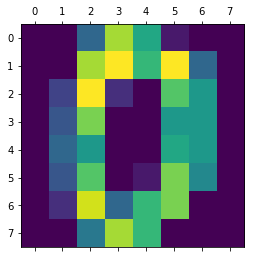

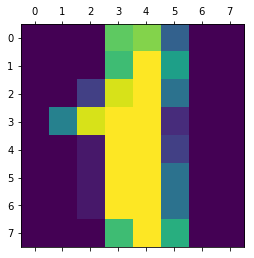

In [8]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, pairwise_distances
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

digits = load_digits(n_class=10, return_X_y=False)
print('Shape:', digits.data.shape)

plt.matshow(digits.images[0]) 
plt.matshow(digits.images[1]) 

### Utilities and helpers

In [9]:
def show_result(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # print("Mean squared error: %.2f" % np.mean((y_pred - y_true) ** 2))
    print('Accuracy score: %.2f' % accuracy_score(y_true, y_pred))
    print()
    print("Confusion Matrix")
    print(cm)

    area = np.pi * (10 * np.random.rand(len(y_pred)))**2
    colors = np.random.rand(len(y_pred))
    plt.scatter(y_true, y_pred, s=area, c=colors, alpha=0.5)

def train_and_test(classifier):
    classifier.fit(X_train, y_train)
    Y = classifier.predict(X_test)
    show_result(y_test, Y)
    
def find_best_k(classifier):
    parameters = {'k':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    grid_search = GridSearchCV(classifier, parameters, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

    cvres = grid_search.cv_results_
    for ms, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(int(params["k"]), ':', np.sqrt(-ms))
    
#     x = np.array(list(map(lambda p: int(p["k"]), cvres["params"])))
#     y = np.array(list(map(lambda p: np.sqrt(-ms), cvres["mean_test_score"])))
#     plt.plot(x.T, y.T)
    
    return grid_search.best_params_["k"]

### Splitting data

In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(digits.data, digits.target, test_size=0.2)

### Naive  kNN implementation

In [11]:
class NaiveKNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k = None):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_test):
        res = np.zeros(len(X_test))
        if self.k is None: 
            return res
        
        for (i, x) in enumerate(X_test):
            distance = self.__distance__(x.reshape(1, len(x)), self.X)
            indices = np.argsort(distance).ravel()[:self.k]
            res[i] = np.bincount(self.y[indices]).argmax()
        return res

    def __distance__(self, x, y):
        d = pairwise_distances(x, y, 'euclidean', squared=True)
        d = np.sqrt(d)
        return d

### Picking best hyperparameter k

In [12]:
k = find_best_k(NaiveKNNClassifier())

{'k': 3}
1 : 0.6303614851404739
2 : 0.7381633812734326
3 : 0.5589780913515261
4 : 0.6929408449599278
5 : 0.6423902823659605
6 : 0.7200286084164055
7 : 0.6186613154569042
8 : 0.6605495276637994
9 : 0.6050126956229898
10 : 0.6710019098172726


### Outputing naive KNN classifier

Accuracy score: 0.99

Confusion Matrix
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  1  0  0  0  0  0  0  1 26]]


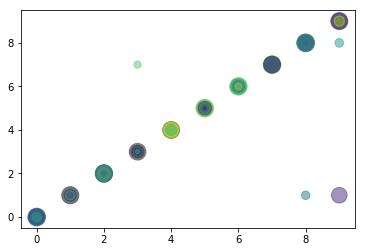

In [13]:
train_and_test(NaiveKNNClassifier(k))

### Using KNeighborsClassifier from sklearn to test data

Accuracy score: 0.99

Confusion Matrix
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  1  0  0  0  0  0  0  1 26]]


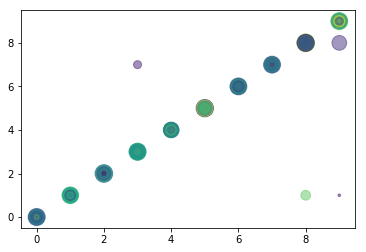

In [14]:
train_and_test(KNeighborsClassifier(k))